In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import dill to save the model



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, SGDRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor,XGBRFRegressor

from sklearn.neural_network import MLPRegressor

# Load the data from dill db




##### Data Description

Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.


In [2]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/sid2983/firste2eml/main/experiment/data.csv")
raw_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
data = pd.read_csv('train.csv')
data.head()


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
data.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
data.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [7]:
data.cut.value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [8]:
data.color.value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [9]:
data.clarity.value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [10]:
data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [11]:
data.drop('id', axis=1, inplace=True)

In [12]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [13]:
data.duplicated().sum()

0

#### EDA

In [14]:
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(exclude=np.number).columns
print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)


Numerical Columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [15]:
for col in cat_cols:
    print(col, data[col].unique())

cut ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
color ['F' 'J' 'G' 'E' 'D' 'H' 'I']
clarity ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


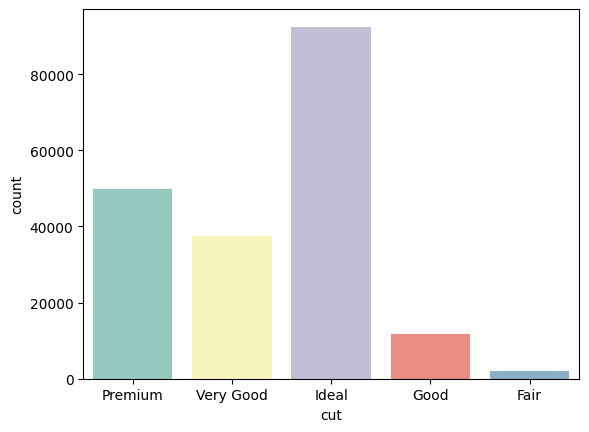

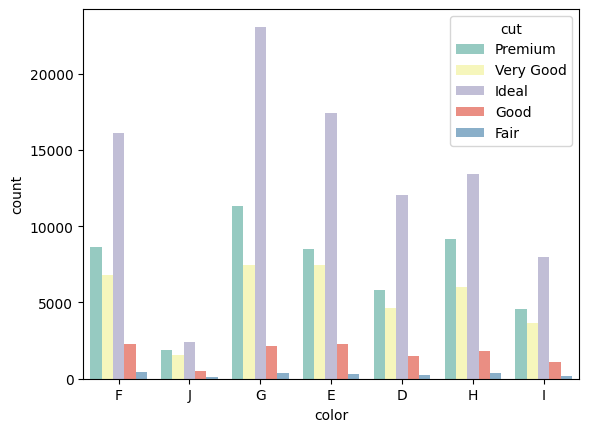

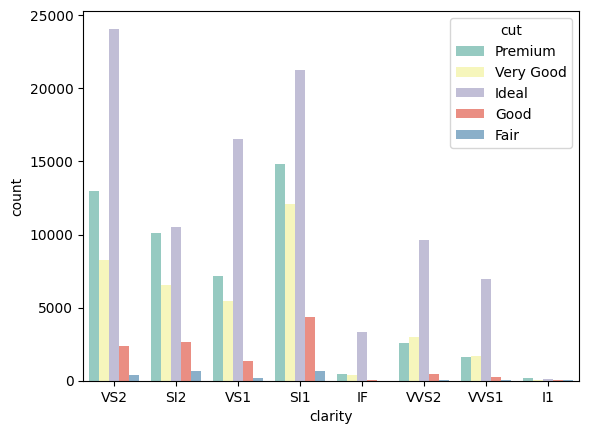

In [16]:
for col in cat_cols:
    sns.countplot(x=data[col],palette='Set3', hue=data['cut'])
    plt.show()

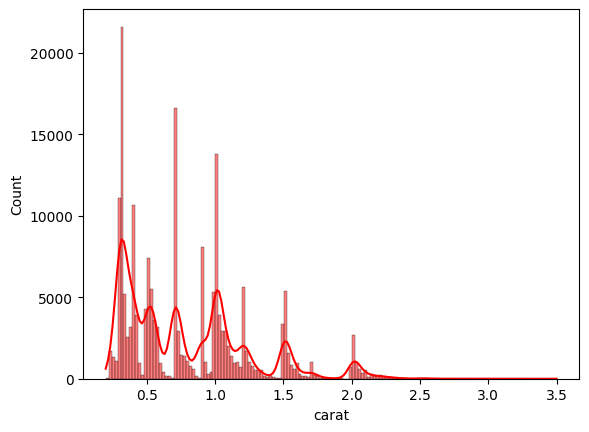

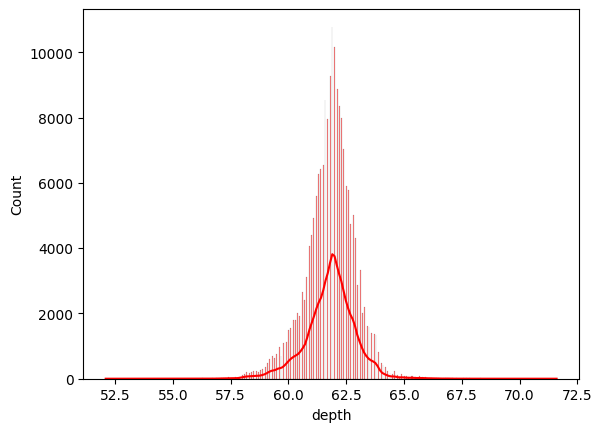

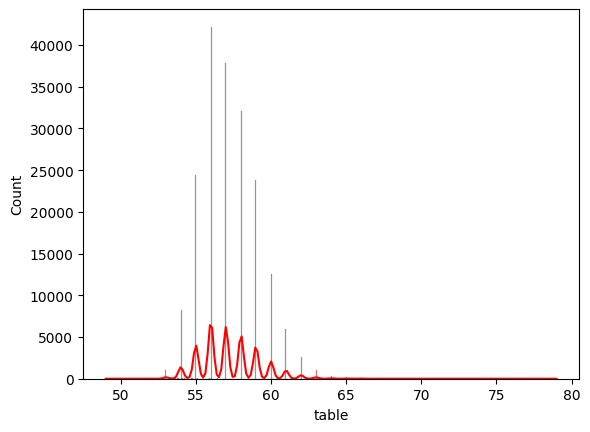

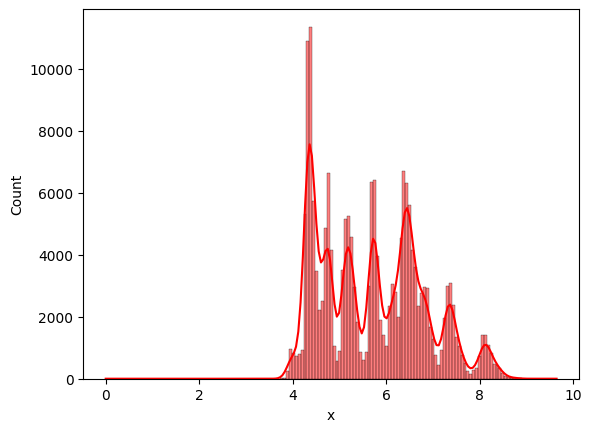

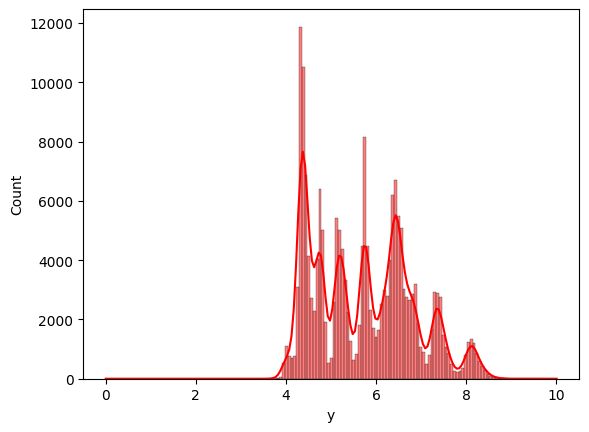

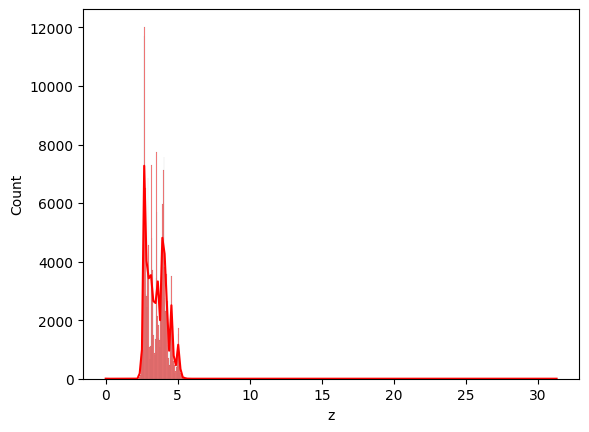

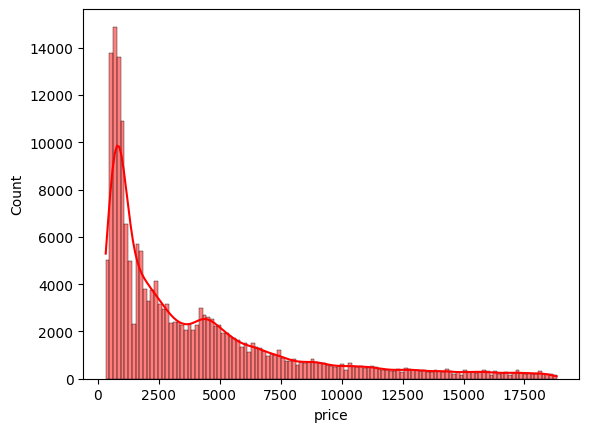

In [17]:
for col in num_cols:
    sns.histplot(data[col], kde=True,color='red')
    plt.show()

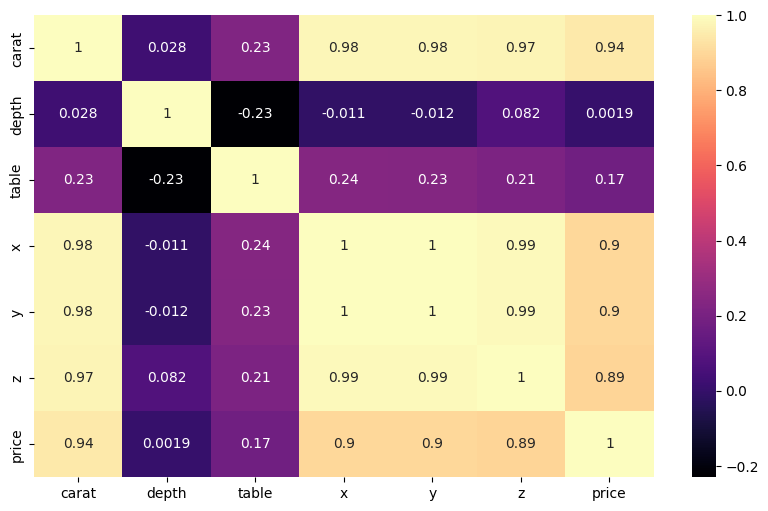

In [18]:
# Correlation Matrix

plt.figure(figsize=(10, 6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='magma')
plt.show()


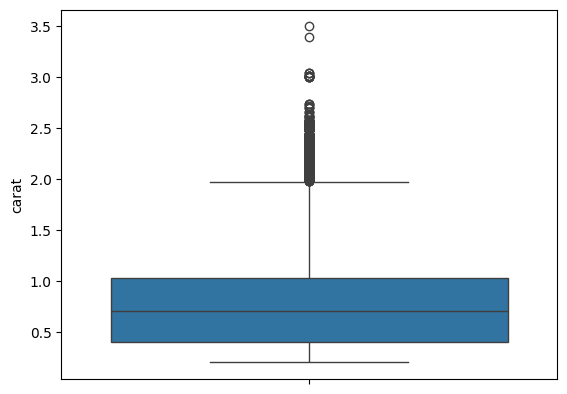

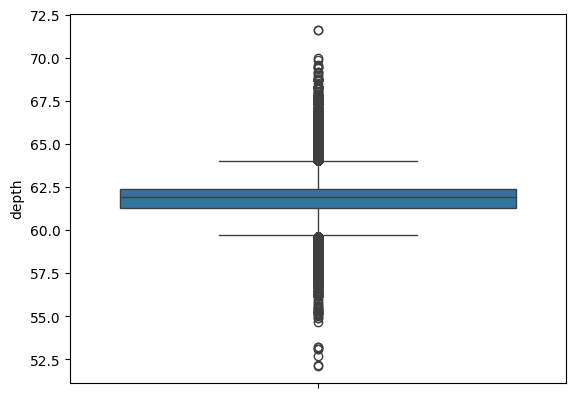

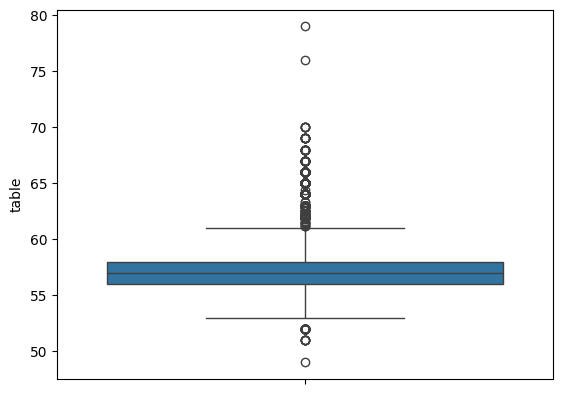

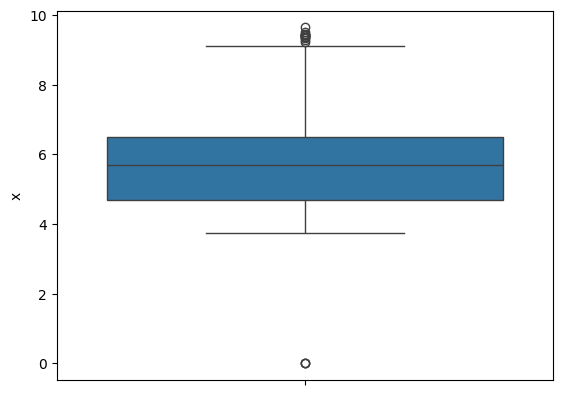

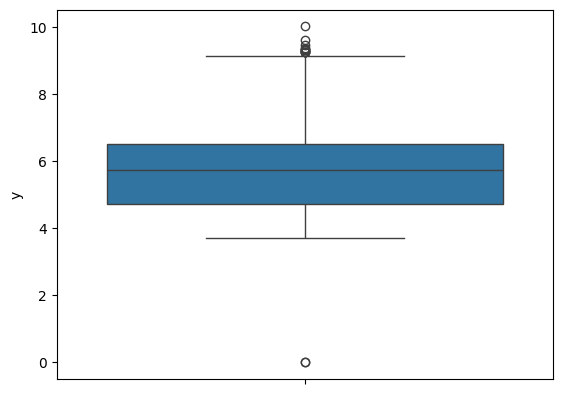

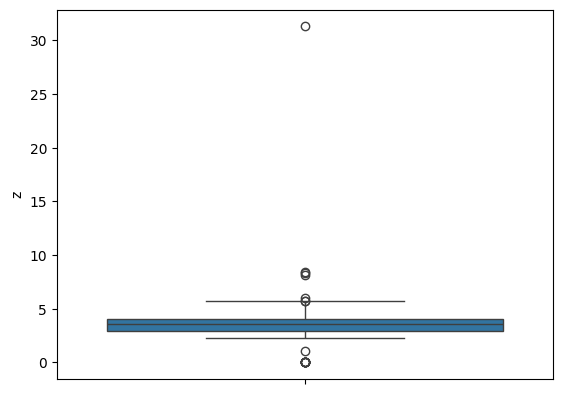

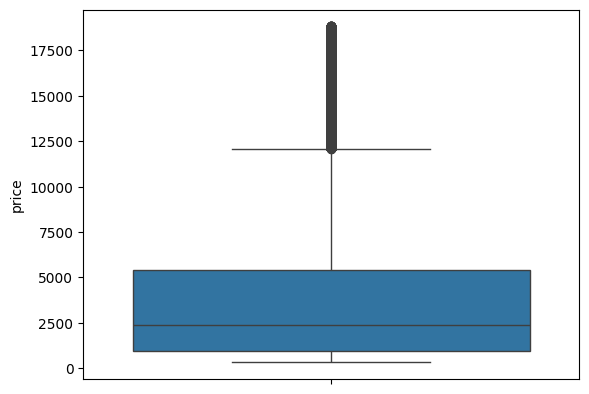

In [19]:
# Outliers

for col in num_cols:
    sns.boxplot(data[col])
    plt.show()

In [20]:
data.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


##### Feature Engineering

In [21]:
#Encoding

cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
clarity_map = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}


data['cut'] = data['cut'].map(cut_map)
data['clarity'] = data['clarity'].map(clarity_map)

data.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,F,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,J,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,G,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,G,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,G,4,62.6,59.0,7.65,7.61,4.77,14453


In [22]:
color_map = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}

data['color'] = data['color'].map(color_map)

data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [23]:
X = data.drop('price', axis=1)
y = data['price']



In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print('Cross Validation Score:', cross_val_score(lr, X_train, y_train, cv=5).mean())

R2 Score: 0.9361253831282493
Mean Squared Error: 1036646.0469698338
Mean Absolute Error: 675.8646403365949
Cross Validation Score: 0.9366825076794211


In [26]:
# get all parameters of the model
lr.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [27]:
sgd_pipe = Pipeline([ ('sgd', SGDRegressor())])

param_grid = {
    'sgd__alpha': [0.0001, 0.001,],
    'sgd__max_iter': [1000, 2000, 3000,4000],
    'sgd__penalty': ['l1', 'l2'],
    'sgd__learning_rate': ['adaptive'],
    'sgd__eta0': [0.01, 0.1,],
    'sgd__tol': [1e-3, 1e-4, 1e-5]



}

sgd_grid = GridSearchCV(sgd_pipe, param_grid, cv=5, n_jobs=-1,verbose=2)
sgd_grid.fit(X_train, y_train)
y_pred = sgd_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('best parameters:', sgd_grid.best_params_)




Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 

In [ ]:
sgd_grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('sgd',
   SGDRegressor(learning_rate='adaptive', max_iter=2000, penalty='l1', tol=0.0001))],
 'verbose': False,
 'sgd': SGDRegressor(learning_rate='adaptive', max_iter=2000, penalty='l1', tol=0.0001),
 'sgd__alpha': 0.0001,
 'sgd__average': False,
 'sgd__early_stopping': False,
 'sgd__epsilon': 0.1,
 'sgd__eta0': 0.01,
 'sgd__fit_intercept': True,
 'sgd__l1_ratio': 0.15,
 'sgd__learning_rate': 'adaptive',
 'sgd__loss': 'squared_error',
 'sgd__max_iter': 2000,
 'sgd__n_iter_no_change': 5,
 'sgd__penalty': 'l1',
 'sgd__power_t': 0.25,
 'sgd__random_state': None,
 'sgd__shuffle': True,
 'sgd__tol': 0.0001,
 'sgd__validation_fraction': 0.1,
 'sgd__verbose': 0,
 'sgd__warm_start': False}

In [ ]:
# ridge cv

ridge_pipe = Pipeline([('ridge', RidgeCV())])

param_grid = {
    'ridge__alphas': [(0.1, 1.0, 10.0), (0.1, 0.5, 1.0), (0.1, 0.2, 0.3, 0.4, 0.5),(0.001, 0.01, 0.1),  (0.0001, 0.001, 0.01),(0.0003)],
}

ridge_grid = GridSearchCV(ridge_pipe, param_grid, cv=5, n_jobs=-1, verbose=2)
ridge_grid.fit(X_train, y_train)
y_pred = ridge_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

print('best parameters:', ridge_grid.best_params_)
ridge_grid.best_estimator_.get_params()



Fitting 5 folds for each of 6 candidates, totalling 30 fits
R2 Score: 0.9361244831004386
Mean Squared Error: 1036660.6538718842
best parameters: {'ridge__alphas': 0.0003}


{'memory': None,
 'steps': [('ridge', RidgeCV(alphas=0.0003))],
 'verbose': False,
 'ridge': RidgeCV(alphas=0.0003),
 'ridge__alpha_per_target': False,
 'ridge__alphas': 0.0003,
 'ridge__cv': None,
 'ridge__fit_intercept': True,
 'ridge__gcv_mode': None,
 'ridge__scoring': None,
 'ridge__store_cv_results': None,
 'ridge__store_cv_values': 'deprecated'}

In [ ]:
# lasso cv

lasso_pipe = Pipeline([('lasso', LassoCV())])

param_grid = {
    'lasso__alphas': [(0.1, 1.0, 10.0), (0.1, 0.5, 1.0), (0.1, 0.2, 0.3, 0.4, 0.5),(0.0001, 0.001, 0.01),(0.0003)],
}

lasso_grid = GridSearchCV(lasso_pipe, param_grid, cv=5, n_jobs=-1, verbose=2)

lasso_grid.fit(X_train, y_train)

y_pred = lasso_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('best parameters:', lasso_grid.best_params_)

lasso_grid.best_estimator_.get_params()



Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\IIISI\OneDrive\Documents\py\mlops\firste2eml\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\IIISI\OneDrive\Documents\py\mlops\firste2eml\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\IIISI\OneDrive\Documents\py\mlops\firste2eml\env\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\IIISI

R2 Score: 0.9361187783024691
Mean Squared Error: 1036753.2392610973
Mean Absolute Error: 676.5047031459931
best parameters: {'lasso__alphas': (0.1, 0.2, 0.3, 0.4, 0.5)}


{'memory': None,
 'steps': [('lasso', LassoCV(alphas=(0.1, 0.2, 0.3, 0.4, 0.5)))],
 'verbose': False,
 'lasso': LassoCV(alphas=(0.1, 0.2, 0.3, 0.4, 0.5)),
 'lasso__alphas': (0.1, 0.2, 0.3, 0.4, 0.5),
 'lasso__copy_X': True,
 'lasso__cv': None,
 'lasso__eps': 0.001,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__n_alphas': 100,
 'lasso__n_jobs': None,
 'lasso__positive': False,
 'lasso__precompute': 'auto',
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__verbose': False}

In [ ]:
# elastic net cv

elastic_pipe = Pipeline([('elastic', ElasticNetCV())])

param_grid = {
    'elastic__alphas': [(0.0001, 0.001, 0.01)],
    'elastic__l1_ratio': [0.5],
    'elastic__max_iter': [8000],
}

elastic_grid = GridSearchCV(elastic_pipe, param_grid, cv=5, n_jobs=-1, verbose=2)

elastic_grid.fit(X_train, y_train)

y_pred = elastic_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print('best parameters:', elastic_grid.best_params_)

elastic_grid.best_estimator_.get_params()









Fitting 5 folds for each of 1 candidates, totalling 5 fits
R2 Score: 0.9361224089045455
Mean Squared Error: 1036694.3168052783
Mean Absolute Error: 676.0774266555765
best parameters: {'elastic__alphas': (0.0001, 0.001, 0.01), 'elastic__l1_ratio': 0.5, 'elastic__max_iter': 8000}


{'memory': None,
 'steps': [('elastic',
   ElasticNetCV(alphas=(0.0001, 0.001, 0.01), max_iter=8000))],
 'verbose': False,
 'elastic': ElasticNetCV(alphas=(0.0001, 0.001, 0.01), max_iter=8000),
 'elastic__alphas': (0.0001, 0.001, 0.01),
 'elastic__copy_X': True,
 'elastic__cv': None,
 'elastic__eps': 0.001,
 'elastic__fit_intercept': True,
 'elastic__l1_ratio': 0.5,
 'elastic__max_iter': 8000,
 'elastic__n_alphas': 100,
 'elastic__n_jobs': None,
 'elastic__positive': False,
 'elastic__precompute': 'auto',
 'elastic__random_state': None,
 'elastic__selection': 'cyclic',
 'elastic__tol': 0.0001,
 'elastic__verbose': 0}

In [ ]:

# SVR model
# lets do polynomialisation with ridge regression

from sklearn.preprocessing import PolynomialFeatures

poly_ridge_pipe = Pipeline([('poly', PolynomialFeatures()), ('ridge', Ridge())])

param_grid = {
    'poly__degree': [2, 3],
    'ridge__alpha': [0.1, 1.0, 5.0,7.0, 10.0,20.0,22.0,25.0,27.0],
    
}

poly_ridge_grid = GridSearchCV(poly_ridge_pipe, param_grid, cv=5, n_jobs=-1, verbose=2)

poly_ridge_grid.fit(X_train, y_train)

y_pred = poly_ridge_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print('best parameters:', poly_ridge_grid.best_params_)

poly_ridge_grid.best_estimator_.get_params()





Fitting 5 folds for each of 18 candidates, totalling 90 fits
R2 Score: 0.9687019296218146
Mean Squared Error: 507948.5799574132
Mean Absolute Error: 418.16380008029506
best parameters: {'poly__degree': 2, 'ridge__alpha': 25.0}


{'memory': None,
 'steps': [('poly', PolynomialFeatures()), ('ridge', Ridge(alpha=25.0))],
 'verbose': False,
 'poly': PolynomialFeatures(),
 'ridge': Ridge(alpha=25.0),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'ridge__alpha': 25.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [ ]:
# polynomial features with lasso regression

poly_lasso_pipe = Pipeline([('poly', PolynomialFeatures()), ('lasso', Lasso())])

param_grid = {
    'poly__degree': [2, 3],
    'lasso__alpha': [0.1, 1.0, 5.0,7.0, 10.0,20.0,22.0,25.0,27.0],
    
}

poly_lasso_grid = GridSearchCV(poly_lasso_pipe, param_grid, cv=5, n_jobs=-1, verbose=2)

poly_lasso_grid.fit(X_train, y_train)

y_pred = poly_lasso_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('best parameters:', poly_lasso_grid.best_params_)
poly_lasso_grid.best_estimator_.get_params()


Fitting 5 folds for each of 18 candidates, totalling 90 fits
R2 Score: 0.9685998611137088
Mean Squared Error: 509605.08954807743
Mean Absolute Error: 418.99762703410863
best parameters: {'lasso__alpha': 1.0, 'poly__degree': 2}


c:\Users\IIISI\OneDrive\Documents\py\mlops\firste2eml\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.799e+09, tolerance: 2.365e+08
  model = cd_fast.enet_coordinate_descent(


{'memory': None,
 'steps': [('poly', PolynomialFeatures()), ('lasso', Lasso())],
 'verbose': False,
 'poly': PolynomialFeatures(),
 'lasso': Lasso(),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [ ]:

## Decision Tree Regressor

dec_pipe = Pipeline([('dec', DecisionTreeRegressor())])

param_grid = {
    'dec__max_depth': [5, 10,12],
    'dec__min_samples_split': [10,30,40,50],
    'dec__min_samples_leaf': [1, 2, 4],
    'dec__ccp_alpha': [0.0, 0.01, 0.05,0.1]

    }

dec_grid = GridSearchCV(dec_pipe, param_grid, cv=4, n_jobs=-1, verbose=2)

dec_grid.fit(X_train, y_train)

y_pred = dec_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print('best parameters:', dec_grid.best_params_)

dec_grid.best_estimator_.get_params()



Fitting 4 folds for each of 144 candidates, totalling 576 fits


c:\Users\IIISI\OneDrive\Documents\py\mlops\firste2eml\env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


R2 Score: 0.9766014205892005
Mean Squared Error: 379744.6628856815
Mean Absolute Error: 312.7585825316286
best parameters: {'dec__ccp_alpha': 0.01, 'dec__max_depth': 12, 'dec__min_samples_leaf': 4, 'dec__min_samples_split': 50}


{'memory': None,
 'steps': [('dec',
   DecisionTreeRegressor(ccp_alpha=0.01, max_depth=12, min_samples_leaf=4,
                         min_samples_split=50))],
 'verbose': False,
 'dec': DecisionTreeRegressor(ccp_alpha=0.01, max_depth=12, min_samples_leaf=4,
                       min_samples_split=50),
 'dec__ccp_alpha': 0.01,
 'dec__criterion': 'squared_error',
 'dec__max_depth': 12,
 'dec__max_features': None,
 'dec__max_leaf_nodes': None,
 'dec__min_impurity_decrease': 0.0,
 'dec__min_samples_leaf': 4,
 'dec__min_samples_split': 50,
 'dec__min_weight_fraction_leaf': 0.0,
 'dec__monotonic_cst': None,
 'dec__random_state': None,
 'dec__splitter': 'best'}

In [ ]:
# set the best params with polynomial features and apply the model

poly_dec_pipe = Pipeline([('poly', PolynomialFeatures()), ('dec', DecisionTreeRegressor())])

param_grid = {
    'poly__degree': [2, 3],
    'dec__max_depth': [5, 10, 15],
    'dec__min_samples_split': [20, 30],
    'dec__min_samples_leaf': [1, 2, 4],
    'dec__ccp_alpha': [0.0, 0.01, 0.05, 0.1]

}

poly_dec_grid = GridSearchCV(poly_dec_pipe, param_grid, cv=3, n_jobs=-1, verbose=2)

poly_dec_grid.fit(X_train, y_train)

y_pred = poly_dec_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print('best parameters:', poly_dec_grid.best_params_)

poly_dec_grid.best_estimator_.get_params()



Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\IIISI\OneDrive\Documents\py\mlops\firste2eml\env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


R2 Score: 0.9759725746372854
Mean Squared Error: 389950.4488791189
Mean Absolute Error: 322.40347229968717
best parameters: {'dec__ccp_alpha': 0.01, 'dec__max_depth': 10, 'dec__min_samples_leaf': 4, 'dec__min_samples_split': 30, 'poly__degree': 2}


{'memory': None,
 'steps': [('poly', PolynomialFeatures()),
  ('dec',
   DecisionTreeRegressor(ccp_alpha=0.01, max_depth=10, min_samples_leaf=4,
                         min_samples_split=30))],
 'verbose': False,
 'poly': PolynomialFeatures(),
 'dec': DecisionTreeRegressor(ccp_alpha=0.01, max_depth=10, min_samples_leaf=4,
                       min_samples_split=30),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'dec__ccp_alpha': 0.01,
 'dec__criterion': 'squared_error',
 'dec__max_depth': 10,
 'dec__max_features': None,
 'dec__max_leaf_nodes': None,
 'dec__min_impurity_decrease': 0.0,
 'dec__min_samples_leaf': 4,
 'dec__min_samples_split': 30,
 'dec__min_weight_fraction_leaf': 0.0,
 'dec__monotonic_cst': None,
 'dec__random_state': None,
 'dec__splitter': 'best'}

##### Ensemble Models

In [ ]:
rf_pipe = Pipeline([('rf', RandomForestRegressor())])

param_grid = {
    'rf__n_estimators': [200],
    'rf__max_depth': [10, 15],
    'rf__min_samples_split': [15,20],
    'rf__min_samples_leaf': [ 2 ],
    
    'rf__ccp_alpha': [0.0, 0.02]

}

rf_grid = GridSearchCV(rf_pipe, param_grid, cv=3, n_jobs=-1, verbose=2)

rf_grid.fit(X_train, y_train)

y_pred = rf_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print('best parameters:', rf_grid.best_params_)

rf_grid.best_estimator_.get_params()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
R2 Score: 0.978630210661493
Mean Squared Error: 346818.63825219637
Mean Absolute Error: 296.3894223286479
best parameters: {'rf__ccp_alpha': 0.02, 'rf__max_depth': 15, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 20, 'rf__n_estimators': 200}


{'memory': None,
 'steps': [('rf',
   RandomForestRegressor(ccp_alpha=0.02, max_depth=15, min_samples_leaf=2,
                         min_samples_split=20, n_estimators=200))],
 'verbose': False,
 'rf': RandomForestRegressor(ccp_alpha=0.02, max_depth=15, min_samples_leaf=2,
                       min_samples_split=20, n_estimators=200),
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.02,
 'rf__criterion': 'squared_error',
 'rf__max_depth': 15,
 'rf__max_features': 1.0,
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 2,
 'rf__min_samples_split': 20,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__monotonic_cst': None,
 'rf__n_estimators': 200,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

In [ ]:
rf_grid.best_estimator_[0].get_params()
#print r2 score, mean squared error, mean absolute error, best parameters and best estimator parameters
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 0.9785550404692547


In [ ]:
## Gradient Boosting Regressor

gb_pipe = Pipeline([('gb', GradientBoostingRegressor())])

param_grid = {
    'gb__n_estimators': [150],
    'gb__learning_rate': [0.01,0.1,1],
    'gb__max_depth': [3, 5],
    'gb__min_samples_split': [2,4,6],
    'gb__min_samples_leaf': [2, 4],
    # 'gb__ccp_alpha': [0.0, 0.02]
}

gb_grid = GridSearchCV(gb_pipe, param_grid, cv=3, n_jobs=-1, verbose=2)

gb_grid.fit(X_train, y_train)

y_pred = gb_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print('best parameters:', gb_grid.best_params_)

gb_grid.best_estimator_.get_params()


Fitting 3 folds for each of 36 candidates, totalling 108 fits
R2 Score: 0.9791687809949242
Mean Squared Error: 338077.9704484651
Mean Absolute Error: 296.71880080359705
best parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__min_samples_leaf': 4, 'gb__min_samples_split': 6, 'gb__n_estimators': 150}


{'memory': None,
 'steps': [('gb',
   GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=6,
                             n_estimators=150))],
 'verbose': False,
 'gb': GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=6,
                           n_estimators=150),
 'gb__alpha': 0.9,
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'squared_error',
 'gb__max_depth': 5,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_samples_leaf': 4,
 'gb__min_samples_split': 6,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 150,
 'gb__n_iter_no_change': None,
 'gb__random_state': None,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False}

In [ ]:

# XGBoost Regressor

xgb_pipe = Pipeline([('xgb', XGBRegressor())])

param_grid = {
    'xgb__n_estimators': [150,200],
    'xgb__learning_rate': [0.1,0.3],
    'xgb__max_depth': [3, 5,7],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__reg_lambda': [1],
    'xgb__reg_gamma': [0],
  
}

xgb_grid = GridSearchCV(xgb_pipe, param_grid, cv=4, n_jobs=-1, verbose=2)

xgb_grid.fit(X_train, y_train)

y_pred = xgb_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

# print('best parameters:', xgb_grid.best_params_)

xgb_grid.best_estimator_.get_params()



Fitting 4 folds for each of 108 candidates, totalling 432 fits
R2 Score: 0.9791222214698792
Mean Squared Error: 338833.98310354847
Mean Absolute Error: 296.5657136294942


{'memory': None,
 'steps': [('xgb',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=5, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...))],
 'verbose': False,
 'xgb': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, devi

Fitting 4 folds for each of 2 candidates, totalling 8 fits
R2 Score: 0.9779172539710999
Mean Squared Error: 358389.4237723896
Mean Absolute Error: 301.780005490134
best parameters: {'poly__degree': 2}


{'memory': None,
 'steps': [('poly', PolynomialFeatures()),
  ('xgb',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...))],
 'verbose': False,
 'poly': PolynomialFeatures(),
 'xgb': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylev

In [ ]:
## Neural Network

mlp_pipe = Pipeline([
    ('mlp', MLPRegressor(max_iter=1000, random_state=42))
])

param_grid = {
    # 'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100)],
    # 'mlp__activation': ['relu', 'tanh'],
    # 'mlp__solver': ['adam', 'sgd'],
    # 'mlp__alpha': [0.0001, 0.001, 0.01],
    # 'mlp__learning_rate': ['constant', 'adaptive'],
    # 'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    # 'mlp__batch_size': ['auto', 32, 64],

}

mlp_grid = GridSearchCV(mlp_pipe, param_grid, cv=3, n_jobs=-1, verbose=2,scoring='r2')

mlp_grid.fit(X_train, y_train)

y_pred = mlp_grid.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print('best parameters:', mlp_grid.best_params_)

mlp_grid.best_estimator_.get_params()



Fitting 3 folds for each of 1 candidates, totalling 3 fits
R2 Score: 0.9779971412454685
Mean Squared Error: 357092.96849040303
Mean Absolute Error: 311.78225318545884
best parameters: {}


c:\Users\IIISI\OneDrive\Documents\py\mlops\firste2eml\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'memory': None,
 'steps': [('mlp', MLPRegressor(max_iter=1000, random_state=42))],
 'verbose': False,
 'mlp': MLPRegressor(max_iter=1000, random_state=42),
 'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__batch_size': 'auto',
 'mlp__beta_1': 0.9,
 'mlp__beta_2': 0.999,
 'mlp__early_stopping': False,
 'mlp__epsilon': 1e-08,
 'mlp__hidden_layer_sizes': (100,),
 'mlp__learning_rate': 'constant',
 'mlp__learning_rate_init': 0.001,
 'mlp__max_fun': 15000,
 'mlp__max_iter': 1000,
 'mlp__momentum': 0.9,
 'mlp__n_iter_no_change': 10,
 'mlp__nesterovs_momentum': True,
 'mlp__power_t': 0.5,
 'mlp__random_state': 42,
 'mlp__shuffle': True,
 'mlp__solver': 'adam',
 'mlp__tol': 0.0001,
 'mlp__validation_fraction': 0.1,
 'mlp__verbose': False,
 'mlp__warm_start': False}

In [ ]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,7,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,5,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,7,3,62.9,55.0,4.45,4.49,2.81,681


In [28]:
df = data.copy()

In [29]:
df['volume'] = df['x'] * df['y'] * df['z']
df['surface_area'] = 2 * (df['x'] * df['y'] + df['x'] * df['z'] + df['y'] * df['z'])

In [ ]:
train_df['volume'] = train_df['x'] * train_df['y'] * train_df['z']
train_df['surface_area'] = 2 * (train_df['x'] * train_df['y'] + train_df['x'] * train_df['z'] + train_df['y'] * train_df['z'])

In [30]:
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [31]:
from pprint import pprint
pprint(df.corr())

                 carat       cut     color   clarity     depth     table  \
carat         1.000000 -0.150901 -0.292400 -0.348611  0.027852  0.225737   
cut          -0.150901  1.000000  0.022439  0.185145 -0.249720 -0.480481   
color        -0.292400  0.022439  1.000000 -0.088333 -0.035517 -0.034978   
clarity      -0.348611  0.185145 -0.088333  1.000000 -0.060720 -0.184567   
depth         0.027852 -0.249720 -0.035517 -0.060720  1.000000 -0.230631   
table         0.225737 -0.480481 -0.034978 -0.184567 -0.230631  1.000000   
price         0.943396 -0.090948 -0.210859 -0.184439  0.001880  0.174915   
volume        0.998611 -0.139721 -0.292267 -0.345708  0.015253  0.217641   
surface_area  0.994326 -0.146892 -0.282768 -0.361977  0.012498  0.225555   

                 price    volume  surface_area  
carat         0.943396  0.998611      0.994326  
cut          -0.090948 -0.139721     -0.146892  
color        -0.210859 -0.292267     -0.282768  
clarity      -0.184439 -0.345708     -0.361

<Axes: >

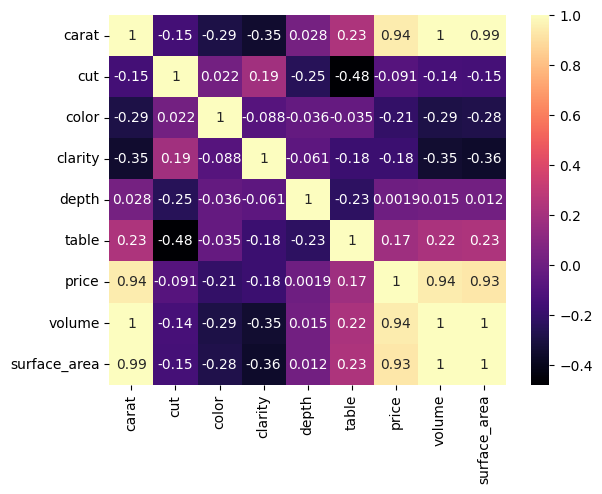

In [ ]:

sns.heatmap(df.corr(), annot=True, cmap='magma')


In [32]:
df

,carat,cut,color,clarity,depth,table,price,volume,surface_area
0,1.52,4,5,4,62.2,58.0,13619,242.465405,239.4382
1,2.03,3,1,2,62.0,58.0,13387,330.508360,294.3124
2,0.70,5,4,5,61.2,57.0,2772,114.112950,145.1474
3,0.32,5,4,5,61.6,56.0,666,52.345818,86.2734
4,1.70,4,4,4,62.6,59.0,14453,277.692705,262.0134
...,...,...,...,...,...,...,...,...,...
193568,0.31,5,7,6,61.1,56.0,1130,50.987655,84.8646
193569,0.70,4,4,6,60.3,58.0,2874,115.125925,146.3038
193570,0.73,3,5,3,63.1,57.0,3036,119.061800,148.8228
193571,0.34,3,7,3,62.9,55.0,681,56.145205,90.2038


In [ ]:
X_new = df.drop('price', axis=1)
y_new = df['price']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)

X_test_new = scaler.transform(X_test_new)

# XGBoost Regressor

xgb_pipe2 = Pipeline([('xgb', XGBRegressor())])

param_grid = {
    'xgb__n_estimators': [150,200],
    'xgb__learning_rate': [0.1,0.3],
    'xgb__max_depth': [3, 5,7],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__reg_lambda': [0.01, 0.1, 1],
  
}

xgb_grid2 = GridSearchCV(xgb_pipe2, param_grid, cv=4, n_jobs=-1, verbose=2)

xgb_grid2.fit(X_train_new, y_train_new)

y_pred = xgb_grid2.predict(X_test_new)

print('R2 Score:', r2_score(y_test_new, y_pred))

print('Mean Squared Error:', mean_squared_error(y_test_new, y_pred))

print('Mean Absolute Error:', mean_absolute_error(y_test_new, y_pred))

# print('best parameters:', xgb_grid2.best_params_)


    

Fitting 4 folds for each of 108 candidates, totalling 432 fits
R2 Score: 0.9791944026947021
Mean Squared Error: 337661.79857658315
Mean Absolute Error: 297.4532324591565


In [ ]:
gb_pipe2 = Pipeline([('gb', GradientBoostingRegressor())])

param_grid = {
    'gb__n_estimators': [150],
    'gb__learning_rate': [0.1,0.3],
    'gb__max_depth': [3, 5],
    'gb__min_samples_split': [4,6],
    'gb__min_samples_leaf': [ 4],
    # 'gb__ccp_alpha': [0.0, 0.02]
}

gb_grid2 = GridSearchCV(gb_pipe2, param_grid, cv=3, n_jobs=-1, verbose=2)

gb_grid2.fit(X_train_new, y_train_new)

y_pred = gb_grid2.predict(X_test_new)

print('R2 Score:', r2_score(y_test_new, y_pred))

print('Mean Squared Error:', mean_squared_error(y_test_new, y_pred))

print('Mean Absolute Error:', mean_absolute_error(y_test_new, y_pred))




Fitting 3 folds for each of 8 candidates, totalling 24 fits
R2 Score: 0.9791871171154074
Mean Squared Error: 337780.3864041828
Mean Absolute Error: 297.4046641630328


##### Neural Network Model

In [ ]:
## ANN
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, AdamW, RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
import xgboost as xgb

c:\Users\IIISI\OneDrive\Documents\py\mlops\firste2eml\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3630/3630 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3958077.0000 - mae: 925.7761 - val_loss: 532580.2500 - val_mae: 372.4877 - learning_rate: 0.0010
Epoch 2/100
3630/3630 ━━━━━━━━━━━━━━━━━━━━ 4s 996us/step - loss: 429730.9375 - mae: 356.9107 - val_loss: 494255.5625 - val_mae: 349.9286 - learning_rate: 0.0010
Epoch 3/100
3630/3630 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 417146.9688 - mae: 345.3696 - val_loss: 549717.4375 - val_mae: 378.5458 - learning_rate: 0.0010
Epoch 4/100
3630/3630 ━━━━━━━━━━━━━━━━━━━━ 4s 965us/step - loss: 418677.4375 - mae: 342.9196 - val_loss: 475256.0625 - val_mae: 339.3575 - learning_rate: 0.0010
Epoch 5/100
3630/3630 ━━━━━━━━━━━━━━━━━━━━ 4s 988us/step - loss: 424122.4062 - mae: 340.7785 - val_loss: 483033.5938 - val_mae: 343.3682 - learning_rate: 0.0010
Epoch 6/100
3630/3630 ━━━━━━━━━━━━━━━━━━━━ 4s 973us/step - loss: 397576.8125 - mae: 333.9852 - val_loss: 462057.3125 - val_mae: 334.4801 - learning_rate: 0.0010
Epoch 7/100
3630/3630 ━━━━━━━━━━━━━━━

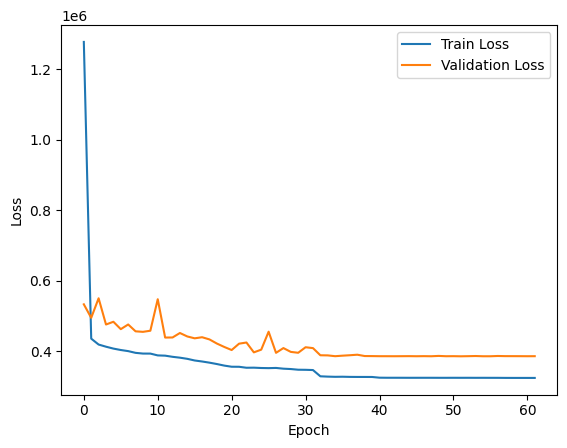

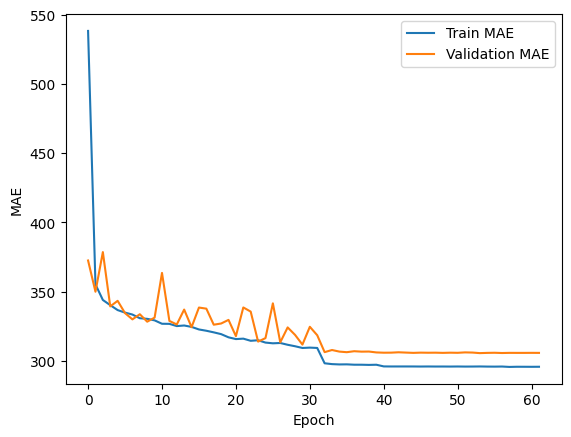

In [ ]:


nn_model = Sequential([
    Dense(128, input_dim=X_train_new.shape[1], activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(1)  # Output layer for regression
])

nn_model.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=0.0001),
                 loss='mean_squared_error',
                 metrics=['mae'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = nn_model.fit(X_train_new, y_train_new, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[reduce_lr, early_stopping])

# Predict using neural network
nn_train_preds = nn_model.predict(X_train_new)
nn_valid_preds = nn_model.predict(X_test_new)

# 2. **Train XGBoost**

xgboost_model = xgb.XGBRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5, alpha=10, gamma=0.1)
xgboost_model.fit(X_train_new, y_train_new)

# Predict using XGBoost
xgboost_train_preds = xgboost_model.predict(X_train_new)
xgboost_valid_preds = xgboost_model.predict(X_test_new)

# 3. **Combine Predictions**

# Stack predictions from both models
train_meta_features = np.column_stack((xgboost_train_preds, nn_train_preds.flatten()))
valid_meta_features = np.column_stack((xgboost_valid_preds, nn_valid_preds.flatten()))

# Train meta-learner
meta_learner = Ridge()
meta_learner.fit(train_meta_features, y_train_new)

# Predict and evaluate
meta_predictions = meta_learner.predict(valid_meta_features)
r2 = r2_score(y_test_new, meta_predictions)
print(f"Stacked Model R² Score: {r2}")

# Plot training history for Neural Network
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()




In [ ]:
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    # save the model to the file
    pickle.dump(meta_learner, files)

In [ ]:
# load saved model
with open('model_pkl' , 'rb') as f:
    lrp = pickle.load(f)
# check prediction

lrp.predict([valid_meta_features[0]])

array([1456.3574], dtype=float32)

In [ ]:

# 100 samples from X_train_new, compare with the predictions from the two models and the meta-learner

data_sample = X_train_new[:100]
xgb_prediction = xgboost_model.predict(data_sample)
nn_prediction = nn_model.predict(data_sample)

data_meta_features = np.column_stack((xgb_prediction, nn_prediction.flatten()))

pred_y = meta_learner.predict(data_meta_features)

# now check the actual values

actual_y = y_train_new[:100]

# create a dataframe to compare the actual and predicted values

df_comp = pd.DataFrame({'Actual': actual_y, 'Predicted': pred_y})


r2 = r2_score(actual_y, pred_y)
print(f"Stacked Model R² Score: {r2}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Stacked Model R² Score: 0.9870889782905579
